In [52]:
import numpy as np
import pandas as pd


In [53]:
states_all_raw = pd.read_csv('data/states_all.csv')
attributes = states_all_raw.columns
Nstudents = [key for key in attributes if 'GRADES' in key]+['ENROLL']
USDrevenue = [key for key in attributes if 'REVENUE' in key]
USDexpense = [key for key in attributes if 'EXPENDITURE' in key]
TestScores = [key for key in attributes if 'SCORE' in key]

# 1

In [54]:
def get_perc_null(df):
    keys, types, nulls = [], [], []
    for col in df.columns:
        type = df[col].dtype
        nullfrac = df[col].isnull().sum()/len(df[col])
        keys.append(col)
        types.append(type)
        nulls.append(nullfrac*100)
    dfout = pd.DataFrame({'Variable': keys, 'Dtype': types, 'percent_null':nulls})
    return dfout

get_perc_null(states_all_raw)

,Variable,Dtype,percent_null
0,PRIMARY_KEY,object,0.000000
1,STATE,object,0.000000
2,YEAR,int64,0.000000
3,ENROLL,float64,28.629738
4,TOTAL_REVENUE,float64,25.655977
5,FEDERAL_REVENUE,float64,25.655977
6,STATE_REVENUE,float64,25.655977
7,LOCAL_REVENUE,float64,25.655977
8,TOTAL_EXPENDITURE,float64,25.655977
9,INSTRUCTION_EXPENDITURE,float64,25.655977


# 2

In [55]:
states = states_all_raw.copy()
states.insert(states.columns.get_loc('GRADES_ALL_G'), 'ENROLL', states.pop('ENROLL'))
dfv00 = states.sort_values(['STATE','YEAR'])


In [56]:
get_perc_null(dfv00)

,Variable,Dtype,percent_null
0,PRIMARY_KEY,object,0.000000
1,STATE,object,0.000000
2,YEAR,int64,0.000000
3,TOTAL_REVENUE,float64,25.655977
4,FEDERAL_REVENUE,float64,25.655977
5,STATE_REVENUE,float64,25.655977
6,LOCAL_REVENUE,float64,25.655977
7,TOTAL_EXPENDITURE,float64,25.655977
8,INSTRUCTION_EXPENDITURE,float64,25.655977
9,SUPPORT_SERVICES_EXPENDITURE,float64,25.655977


In [57]:
pd.set_option('Display.max_columns', None)
df = dfv00.copy()

factor_9_12 = (df['GRADES_9_12_G']/df['GRADES_12_G']).mean()
# factor_9_12 is the avg number of students in grades 9-12 per student in grade 12
Gr_9_12 = df['GRADES_12_G']*factor_9_12
# estimate of the number of students in grades 9-12 based on grade 12

df.insert(df.columns.get_loc('GRADES_9_12_G')+1,
          'Gr_9_12',
          df['GRADES_9_12_G'].fillna(np.round(Gr_9_12)))

factor8_1_8 = (df['GRADES_1_8_G']/df['GRADES_8_G']).mean()
# factor8_1_8 is the avg number of students in grades 1-8 per student in grade 8
factor4_1_8 = (df['GRADES_1_8_G']/df['GRADES_4_G']).mean()
# factor4_1_8 is the avg number of students in grades 1-8 per student in grade 4
Gr8_1_8 = df['GRADES_8_G']*factor8_1_8
# estimate of the number of students in grades 1-8 based on grade 8
Gr4_1_8 = df['GRADES_4_G']*factor4_1_8
# estimate of the number of students in grades 1-8 based on grade 4
Gr_1_8 = pd.DataFrame([Gr8_1_8,Gr4_1_8]).T.mean(axis=1)
# estimate of the number of students in grades 1-8 based on avg of above two estimates

df.insert(df.columns.get_loc('GRADES_1_8_G')+1,
          'Gr_1_8',
          df['GRADES_1_8_G'].fillna(np.round(Gr_1_8)))

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1715 entries, 1275 to 1714
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   TOTAL_REVENUE                 1275 non-null   float64
 4   FEDERAL_REVENUE               1275 non-null   float64
 5   STATE_REVENUE                 1275 non-null   float64
 6   LOCAL_REVENUE                 1275 non-null   float64
 7   TOTAL_EXPENDITURE             1275 non-null   float64
 8   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 9   SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 10  OTHER_EXPENDITURE             1224 non-null   float64
 11  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 12  GRADES_PK_G                   1542 non-null   float64
 13  

In [58]:
df_enroll = states.drop(USDrevenue+USDexpense+TestScores, axis=1).dropna()
temp = df_enroll[['GRADES_PK_G','GRADES_KG_G','GRADES_1_8_G','GRADES_9_12_G']].sum(axis=1)
pd.DataFrame([temp,df_enroll['GRADES_ALL_G']]).T
(df_enroll['GRADES_ALL_G'] - temp).mean()/df_enroll['GRADES_ALL_G'].mean()
# since the percent difference between the total number of students ('GRADES_ALL_G') and the sum (temp) of prek, kindergarten, and grades 1-12 is small on average, we can assume that the number of prek students is approximately equal to the total number of students minus the number of K-12 students

0.006449944355394058

In [59]:
Gr_K_12 = df[['GRADES_KG_G','Gr_1_8','Gr_9_12']].dropna().sum(axis=1)
pd.DataFrame([df['GRADES_ALL_G'], Gr_K_12, df['GRADES_PK_G']]).T.dropna()
# it did not work, estimator is too crude probably. 
# Will drop missing PreK values instead.

,GRADES_ALL_G,Unnamed 0,GRADES_PK_G
0,731634.0,704466.0,8224.0
51,734288.0,706053.0,8264.0
102,736531.0,709078.0,9051.0
153,746149.0,709593.0,9324.0
204,747932.0,713652.0,9633.0
...,...,...,...
1121,92732.0,92218.0,514.0
1172,94067.0,93503.0,564.0
1223,94717.0,94208.0,509.0
1274,94170.0,93506.0,664.0


In [60]:
df.dropna(axis=0, subset='GRADES_PK_G', inplace=True)

In [61]:
df['ENROLL'].fillna(df['GRADES_ALL_G'], inplace=True)
Gr_all = df[['GRADES_ALL_G','ENROLL']].mean(axis=1)
# Total enrollment estimate based on avg of two sources, or only 'GRADES_ALL_G' source where 'ENROLL' is NaN
df.insert(df.columns.get_loc('ENROLL')+1,
          'Gr_all',
          Gr_all)
df

,PRIMARY_KEY,STATE,YEAR,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,Gr_1_8,GRADES_9_12_G,Gr_9_12,GRADES_ALL_G,ENROLL,Gr_all,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,NaN,465240.0,NaN,183766.0,731634.0,731634.0,731634.0,208.0,252.0,207.0,NaN
51,1993_ALABAMA,ALABAMA,1993,2827391.0,331409.0,1729295.0,766687.0,2833433.0,1564558.0,794146.0,237222.0,204207.0,8264.0,56598.0,57497.0,60004.0,39900.0,NaN,471345.0,NaN,178110.0,734288.0,727716.0,731002.0,NaN,NaN,NaN,NaN
102,1994_ALABAMA,ALABAMA,1994,2970223.0,331823.0,1850894.0,787506.0,3103266.0,1697593.0,826442.0,306977.0,231508.0,9051.0,57723.0,56773.0,59165.0,41730.0,NaN,465076.0,NaN,186279.0,736531.0,730004.0,733267.5,NaN,NaN,208.0,NaN
153,1995_ALABAMA,ALABAMA,1995,3367437.0,328957.0,2161366.0,877114.0,3353363.0,1851700.0,888983.0,326956.0,243365.0,9324.0,59739.0,56486.0,59914.0,40981.0,NaN,466919.0,NaN,182935.0,746149.0,727480.0,736814.5,NaN,NaN,NaN,NaN
204,1996_ALABAMA,ALABAMA,1996,3365113.0,334858.0,2138717.0,891538.0,3572283.0,1987018.0,935115.0,322883.0,286699.0,9633.0,60949.0,57098.0,58305.0,42510.0,NaN,462942.0,NaN,189761.0,747932.0,735912.0,741922.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1121,2013_WYOMING,WYOMING,2013,1695967.0,113501.0,881114.0,701352.0,1675477.0,846872.0,546422.0,52001.0,213920.0,514.0,8141.0,7086.0,6867.0,6176.0,57628.0,57628.0,26449.0,26449.0,92732.0,91533.0,92132.5,247.0,288.0,226.0,271.0
1172,2014_WYOMING,WYOMING,2014,1772633.0,112709.0,965213.0,694711.0,1775999.0,865932.0,555761.0,50715.0,287977.0,564.0,7997.0,7438.0,6927.0,6133.0,58774.0,58774.0,26732.0,26732.0,94067.0,92732.0,93399.5,NaN,NaN,NaN,NaN
1223,2015_WYOMING,WYOMING,2015,1962874.0,120290.0,1116917.0,725667.0,1942406.0,895910.0,565489.0,52520.0,409425.0,509.0,7841.0,7551.0,6902.0,6299.0,59453.0,59453.0,26914.0,26914.0,94717.0,93867.0,94292.0,247.0,287.0,228.0,269.0
1274,2016_WYOMING,WYOMING,2016,2044669.0,123012.0,1175899.0,745758.0,2034229.0,921494.0,585700.0,53570.0,454302.0,664.0,7584.0,7642.0,7135.0,6262.0,58998.0,58998.0,26924.0,26924.0,94170.0,94511.0,94340.5,NaN,NaN,NaN,NaN


In [62]:
get_perc_null(df)

,Variable,Dtype,percent_null
0,PRIMARY_KEY,object,0.000000
1,STATE,object,0.000000
2,YEAR,int64,0.000000
3,TOTAL_REVENUE,float64,18.158236
4,FEDERAL_REVENUE,float64,18.158236
5,STATE_REVENUE,float64,18.158236
6,LOCAL_REVENUE,float64,18.158236
7,TOTAL_EXPENDITURE,float64,18.158236
8,INSTRUCTION_EXPENDITURE,float64,18.158236
9,SUPPORT_SERVICES_EXPENDITURE,float64,18.158236


In [63]:
dfv1 = df.drop(['PRIMARY_KEY','GRADES_9_12_G', 'GRADES_1_8_G', 'GRADES_ALL_G', 'ENROLL'], axis=1)
# cleaning up dataframe columns
get_perc_null(dfv1)

,Variable,Dtype,percent_null
0,STATE,object,0.000000
1,YEAR,int64,0.000000
2,TOTAL_REVENUE,float64,18.158236
3,FEDERAL_REVENUE,float64,18.158236
4,STATE_REVENUE,float64,18.158236
5,LOCAL_REVENUE,float64,18.158236
6,TOTAL_EXPENDITURE,float64,18.158236
7,INSTRUCTION_EXPENDITURE,float64,18.158236
8,SUPPORT_SERVICES_EXPENDITURE,float64,18.158236
9,OTHER_EXPENDITURE,float64,21.400778


Now ill partition the columns to make it easier to manipulate:

In [64]:
idcols = pd.Index(['STATE','YEAR'])
scorecols = dfv1.columns[dfv1.columns.str.contains("SCORE", case=False)]
enrollcols = dfv1.columns[dfv1.columns.str.contains("GR", case=False)]
revcols = dfv1.columns[dfv1.columns.str.contains("REVENUE", case=False)]
expcols = dfv1.columns[dfv1.columns.str.contains("EXPENDITURE", case=False)]
idcols, revcols, expcols, enrollcols, scorecols

(Index(['STATE', 'YEAR'], dtype='object'),
 Index(['TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE'], dtype='object'),
 Index(['TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
        'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
        'CAPITAL_OUTLAY_EXPENDITURE'],
       dtype='object'),
 Index(['GRADES_PK_G', 'GRADES_KG_G', 'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G',
        'Gr_1_8', 'Gr_9_12', 'Gr_all'],
       dtype='object'),
 Index(['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE',
        'AVG_READING_8_SCORE'],
       dtype='object'))

Im not sure what else to do here, as the expenditures and scores all vary widely within each state (due to the year, which im supposed to ignore). Perhaps filling each revenue and expenditure thats missing with the median value for each state would work well? The scores are most likely best off if dropped, since ~65% of each are missing.

Alternatively, i could backfill some of the score values first:

In [65]:
dfv1a = dfv1.copy()
dfv1a[scorecols] = dfv1a.groupby('STATE').bfill(4)[scorecols]
dfv1a

,STATE,YEAR,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,Gr_1_8,Gr_9_12,Gr_all,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,ALABAMA,1992,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,465240.0,183766.0,731634.0,208.0,252.0,207.0,NaN
51,ALABAMA,1993,2827391.0,331409.0,1729295.0,766687.0,2833433.0,1564558.0,794146.0,237222.0,204207.0,8264.0,56598.0,57497.0,60004.0,39900.0,471345.0,178110.0,731002.0,NaN,NaN,208.0,NaN
102,ALABAMA,1994,2970223.0,331823.0,1850894.0,787506.0,3103266.0,1697593.0,826442.0,306977.0,231508.0,9051.0,57723.0,56773.0,59165.0,41730.0,465076.0,186279.0,733267.5,NaN,NaN,208.0,255.0
153,ALABAMA,1995,3367437.0,328957.0,2161366.0,877114.0,3353363.0,1851700.0,888983.0,326956.0,243365.0,9324.0,59739.0,56486.0,59914.0,40981.0,466919.0,182935.0,736814.5,NaN,NaN,211.0,255.0
204,ALABAMA,1996,3365113.0,334858.0,2138717.0,891538.0,3572283.0,1987018.0,935115.0,322883.0,286699.0,9633.0,60949.0,57098.0,58305.0,42510.0,462942.0,189761.0,741922.0,217.0,264.0,211.0,255.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1121,WYOMING,2013,1695967.0,113501.0,881114.0,701352.0,1675477.0,846872.0,546422.0,52001.0,213920.0,514.0,8141.0,7086.0,6867.0,6176.0,57628.0,26449.0,92132.5,247.0,288.0,226.0,271.0
1172,WYOMING,2014,1772633.0,112709.0,965213.0,694711.0,1775999.0,865932.0,555761.0,50715.0,287977.0,564.0,7997.0,7438.0,6927.0,6133.0,58774.0,26732.0,93399.5,247.0,287.0,228.0,269.0
1223,WYOMING,2015,1962874.0,120290.0,1116917.0,725667.0,1942406.0,895910.0,565489.0,52520.0,409425.0,509.0,7841.0,7551.0,6902.0,6299.0,59453.0,26914.0,94292.0,247.0,287.0,228.0,269.0
1274,WYOMING,2016,2044669.0,123012.0,1175899.0,745758.0,2034229.0,921494.0,585700.0,53570.0,454302.0,664.0,7584.0,7642.0,7135.0,6262.0,58998.0,26924.0,94340.5,248.0,289.0,227.0,269.0


And then drop the rest:

In [66]:
dfv1a.dropna()

,STATE,YEAR,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,Gr_1_8,Gr_9_12,Gr_all,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
204,ALABAMA,1996,3365113.0,334858.0,2138717.0,891538.0,3572283.0,1987018.0,935115.0,322883.0,286699.0,9633.0,60949.0,57098.0,58305.0,42510.0,462942.0,189761.0,741922.0,217.0,264.0,211.0,255.0
255,ALABAMA,1997,3981788.0,376200.0,2498847.0,1106741.0,3963624.0,2095904.0,1075352.0,323955.0,420070.0,9886.0,58326.0,57431.0,58210.0,44272.0,472847.0,208148.0,743296.5,217.0,264.0,211.0,255.0
306,ALABAMA,1998,4140537.0,374153.0,2589819.0,1176565.0,4245033.0,2218693.0,1155492.0,357731.0,458351.0,10341.0,58055.0,58610.0,57105.0,43957.0,473954.0,205630.0,743650.5,217.0,264.0,211.0,255.0
357,ALABAMA,1999,4471546.0,393095.0,2752653.0,1325798.0,4622810.0,2399626.0,1208081.0,441314.0,515798.0,10548.0,56120.0,60012.0,56201.0,42576.0,472019.0,202045.0,739185.5,217.0,264.0,207.0,253.0
408,ALABAMA,2000,4885917.0,425978.0,3003814.0,1456125.0,5003267.0,2551713.0,1319053.0,395909.0,663903.0,10836.0,55112.0,59749.0,56951.0,42512.0,472686.0,201358.0,735088.0,217.0,264.0,207.0,253.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,WYOMING,2012,1664983.0,144728.0,851896.0,668359.0,1670728.0,845801.0,540510.0,53299.0,213245.0,540.0,8131.0,7127.0,6874.0,6046.0,56619.0,26243.0,90763.5,247.0,288.0,226.0,271.0
1121,WYOMING,2013,1695967.0,113501.0,881114.0,701352.0,1675477.0,846872.0,546422.0,52001.0,213920.0,514.0,8141.0,7086.0,6867.0,6176.0,57628.0,26449.0,92132.5,247.0,288.0,226.0,271.0
1172,WYOMING,2014,1772633.0,112709.0,965213.0,694711.0,1775999.0,865932.0,555761.0,50715.0,287977.0,564.0,7997.0,7438.0,6927.0,6133.0,58774.0,26732.0,93399.5,247.0,287.0,228.0,269.0
1223,WYOMING,2015,1962874.0,120290.0,1116917.0,725667.0,1942406.0,895910.0,565489.0,52520.0,409425.0,509.0,7841.0,7551.0,6902.0,6299.0,59453.0,26914.0,94292.0,247.0,287.0,228.0,269.0


# 3

Turns out I already filled in the enrollment columns with depending only on that year and state, and thus those can be kept.

In [67]:
yrmean = dfv1.groupby('YEAR').mean()
yrmean.dropna(how='all',subset=scorecols)[scorecols]

,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
YEAR,,,,
1990,NaN,263.812500,NaN,NaN
1992,218.219512,266.073171,215.146341,NaN
1994,NaN,NaN,212.461538,NaN
1998,NaN,NaN,213.205128,260.333333
2000,223.725000,271.102564,NaN,NaN
2002,NaN,NaN,217.681818,262.523810
2003,233.921569,276.764706,217.431373,262.392157
2005,237.117647,277.725490,218.078431,261.666667
2007,239.176471,280.686275,220.372549,262.058824


In [68]:
yrmean.insert(yrmean.columns.get_loc('AVG_MATH_8_SCORE')+1,
'MATH_8_4_RATIO', yrmean['AVG_MATH_8_SCORE']/yrmean['AVG_MATH_4_SCORE'])
# this calculates the average grade 8 math score as a fraction of the average grade 4 math score for each year
yrmean.insert(yrmean.columns.get_loc('AVG_READING_8_SCORE')+1,
'READING_8_4_RATIO', yrmean['AVG_READING_8_SCORE']/yrmean['AVG_READING_4_SCORE'])
# this calculates the average grade 8 reading score as a fraction of the average grade 4 reading score for each year
yrmean.insert(yrmean.columns.size,
'4_READING_MATH_RATIO', yrmean['AVG_READING_4_SCORE']/yrmean['AVG_MATH_4_SCORE'])
# this calculates the average grade 4 reading score as a fraction of the average grade 4 math score for each year
yrmean.insert(yrmean.columns.size,
'8_READING_MATH_RATIO', yrmean['AVG_READING_8_SCORE']/yrmean['AVG_MATH_8_SCORE'])
# this calculates the average grade 8 reading score as a fraction of the average grade 8 math score for each year
scoreratios = yrmean[['MATH_8_4_RATIO', 'READING_8_4_RATIO', '4_READING_MATH_RATIO', '8_READING_MATH_RATIO']].copy()
scoreratios_yr = scoreratios.copy().dropna(how='all')
    # drop rows with no score ratios, 
scoreratios_yr.fillna(scoreratios_yr.mean(), inplace=True)
    # then fill columns with averages
scoreratios_yr

,MATH_8_4_RATIO,READING_8_4_RATIO,4_READING_MATH_RATIO,8_READING_MATH_RATIO
YEAR,,,,
1992,1.219291,1.201707,0.985917,0.938631
1998,1.184108,1.221046,0.928229,0.938631
2000,1.211767,1.201707,0.928229,0.938631
2002,1.184108,1.205998,0.928229,0.938631
2003,1.183152,1.206781,0.929505,0.948069
2005,1.171256,1.199874,0.919706,0.942177
2007,1.173553,1.189163,0.921381,0.933636
2009,1.179028,1.195619,0.919368,0.932306
2011,1.178898,1.202066,0.915607,0.933601


In [69]:
scoreratios.fillna(scoreratios_yr, inplace=True)
# repopulate original ratio dataframe with these values
scoreratios

,MATH_8_4_RATIO,READING_8_4_RATIO,4_READING_MATH_RATIO,8_READING_MATH_RATIO
YEAR,,,,
1986,NaN,NaN,NaN,NaN
1987,NaN,NaN,NaN,NaN
1988,NaN,NaN,NaN,NaN
1989,NaN,NaN,NaN,NaN
1990,NaN,NaN,NaN,NaN
1991,NaN,NaN,NaN,NaN
1992,1.219291,1.201707,0.985917,0.938631
1993,NaN,NaN,NaN,NaN
1994,NaN,NaN,NaN,NaN


In [70]:
scoreratios = scoreratios.bfill(limit=2).ffill(limit=2)
# then back and front fill since numbers are mostly uniform
scoreratios

,MATH_8_4_RATIO,READING_8_4_RATIO,4_READING_MATH_RATIO,8_READING_MATH_RATIO
YEAR,,,,
1986,NaN,NaN,NaN,NaN
1987,NaN,NaN,NaN,NaN
1988,NaN,NaN,NaN,NaN
1989,NaN,NaN,NaN,NaN
1990,1.219291,1.201707,0.985917,0.938631
1991,1.219291,1.201707,0.985917,0.938631
1992,1.219291,1.201707,0.985917,0.938631
1993,1.219291,1.201707,0.985917,0.938631
1994,1.219291,1.201707,0.985917,0.938631


In [71]:
scoreratios.dropna(inplace=True)
# and drop rows with no ratios, since theres no scores for those years anyway
scoreratios

,MATH_8_4_RATIO,READING_8_4_RATIO,4_READING_MATH_RATIO,8_READING_MATH_RATIO
YEAR,,,,
1990,1.219291,1.201707,0.985917,0.938631
1991,1.219291,1.201707,0.985917,0.938631
1992,1.219291,1.201707,0.985917,0.938631
1993,1.219291,1.201707,0.985917,0.938631
1994,1.219291,1.201707,0.985917,0.938631
1996,1.184108,1.221046,0.928229,0.938631
1997,1.184108,1.221046,0.928229,0.938631
1998,1.184108,1.221046,0.928229,0.938631
1999,1.211767,1.201707,0.928229,0.938631


In [72]:
for col in scoreratios.columns:
    shared,numerator,denominator = col.split('_')[:3]
    newcolname=shared+'_'+denominator+'_'+numerator+'_RATIO'
    scoreratios[newcolname]=1/scoreratios[col]
# expand ratio dataframe to include multiplicative inverses
scoreratios

,MATH_8_4_RATIO,READING_8_4_RATIO,4_READING_MATH_RATIO,8_READING_MATH_RATIO,MATH_4_8_RATIO,READING_4_8_RATIO,4_MATH_READING_RATIO,8_MATH_READING_RATIO
YEAR,,,,,,,,
1990,1.219291,1.201707,0.985917,0.938631,0.820149,0.832150,1.014284,1.065381
1991,1.219291,1.201707,0.985917,0.938631,0.820149,0.832150,1.014284,1.065381
1992,1.219291,1.201707,0.985917,0.938631,0.820149,0.832150,1.014284,1.065381
1993,1.219291,1.201707,0.985917,0.938631,0.820149,0.832150,1.014284,1.065381
1994,1.219291,1.201707,0.985917,0.938631,0.820149,0.832150,1.014284,1.065381
1996,1.184108,1.221046,0.928229,0.938631,0.844517,0.818970,1.077320,1.065381
1997,1.184108,1.221046,0.928229,0.938631,0.844517,0.818970,1.077320,1.065381
1998,1.184108,1.221046,0.928229,0.938631,0.844517,0.818970,1.077320,1.065381
1999,1.211767,1.201707,0.928229,0.938631,0.825241,0.832150,1.077320,1.065381


## The following functions fill in score values using the above multipliers

In [73]:
from IPython.display import display

def get_score_from_score(row, sourcescore, estscore):
    yr=row['YEAR']
    srcsubj,srcgr=sourcescore.split('_')[1],sourcescore.split('_')[2]
    estsubj,estgr=estscore.split('_')[1],estscore.split('_')[2]
    #print(f'To Get {estgr}th grade {estsubj} scores from {srcgr}th grade {srcsubj} scores:')
    if srcsubj==estsubj:
        multname=srcsubj+'_'+estgr+'_'+srcgr+'_RATIO'
        mult=scoreratios.loc[yr,multname]
    elif srcgr==estgr:
        multname=srcgr+'_'+estsubj+'_'+srcsubj+'_RATIO'
        mult=scoreratios.loc[yr,multname]
    else:
        m1 = srcgr+'_'+estsubj+'_'+srcsubj+'_RATIO'
        m2 = estsubj+'_'+estgr+'_'+srcgr+'_RATIO'
        #print(f'{m2}*{m1}')
        mult=scoreratios.loc[yr,m1]*scoreratios.loc[yr,m2]
        return row[sourcescore]*mult
    
    #print(multname)
    srcval=row[sourcescore]
    estval=srcval*mult
    
    return estval

def scorefill_from(row, filledscore):
    scoresout=[[filledscore, row[filledscore]]]
    for subj in ['MATH','READING']:
        for gr in ['4','8']:
            col='AVG_'+subj+'_'+gr+'_SCORE'
            if col!=filledscore:
                scoresout.append([col,get_score_from_score(row, filledscore, col)])
    dict={}
    for pair in scoresout:
        dict[pair[0]]=pair[1]
    return dict

def scorefill(row, displayvals=False):
    rowscores=row[scorecols]
    nullcols = row[scorecols].index[row[scorecols].isnull()]
    nonnullcols = row[scorecols].index[row[scorecols].notnull()]
    if len(nonnullcols)==1:
        estimatedcols = pd.Series(scorefill_from(row, nonnullcols[0]))
    else:
        colfills=[]
        for srcscore in nonnullcols:
            srcscorevals = scorefill_from(row, srcscore)
            colfills.append(srcscorevals)
        estimatedcols = pd.DataFrame(colfills).mean()
        
    newscores = row[scorecols].fillna(np.round(estimatedcols,1))
    vals = pd.DataFrame([rowscores, estimatedcols, newscores], index=['given', 'est', 'new'])
    if displayvals: display(np.round(vals,1))
    return vals.loc['new']

In [74]:
scores = dfv1.dropna(how='all', subset=scorecols)
    # dropped rows missing all score values
q=scores[idcols.union(scorecols, sort=False)]
q

,STATE,YEAR,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,ALABAMA,1992,208.0,252.0,207.0,NaN
102,ALABAMA,1994,NaN,NaN,208.0,NaN
306,ALABAMA,1998,NaN,NaN,211.0,255.0
408,ALABAMA,2000,217.0,264.0,NaN,NaN
510,ALABAMA,2002,NaN,NaN,207.0,253.0
...,...,...,...,...,...,...
917,WYOMING,2009,242.0,286.0,223.0,268.0
1019,WYOMING,2011,244.0,288.0,224.0,270.0
1121,WYOMING,2013,247.0,288.0,226.0,271.0
1223,WYOMING,2015,247.0,287.0,228.0,269.0


### Demonstration of function:

In [75]:
a = scores.loc[102] # contains 3 missing score values
b = scores.loc[306] # contains 2 missing score values
c = scores.loc[0] # contains 1 missing score value

In [76]:
a.fillna(scorefill(a, displayvals=True))

,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
given,NaN,NaN,208.0,NaN
est,211.0,257.2,208.0,250.0
new,211.0,257.2,208.0,250.0


STATE                             ALABAMA
YEAR                                 1994
TOTAL_REVENUE                   2970223.0
FEDERAL_REVENUE                  331823.0
STATE_REVENUE                   1850894.0
LOCAL_REVENUE                    787506.0
TOTAL_EXPENDITURE               3103266.0
INSTRUCTION_EXPENDITURE         1697593.0
SUPPORT_SERVICES_EXPENDITURE     826442.0
OTHER_EXPENDITURE                306977.0
CAPITAL_OUTLAY_EXPENDITURE       231508.0
GRADES_PK_G                        9051.0
GRADES_KG_G                       57723.0
GRADES_4_G                        56773.0
GRADES_8_G                        59165.0
GRADES_12_G                       41730.0
Gr_1_8                           465076.0
Gr_9_12                          186279.0
Gr_all                           733267.5
AVG_MATH_4_SCORE                    211.0
AVG_MATH_8_SCORE                    257.2
AVG_READING_4_SCORE                 208.0
AVG_READING_8_SCORE                 250.0
Name: 102, dtype: object

In [77]:
b.fillna(scorefill(b, displayvals=True))

,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
given,NaN,NaN,211.0,255.0
est,228.4,270.4,209.9,256.3
new,228.4,270.4,211.0,255.0


STATE                             ALABAMA
YEAR                                 1998
TOTAL_REVENUE                   4140537.0
FEDERAL_REVENUE                  374153.0
STATE_REVENUE                   2589819.0
LOCAL_REVENUE                   1176565.0
TOTAL_EXPENDITURE               4245033.0
INSTRUCTION_EXPENDITURE         2218693.0
SUPPORT_SERVICES_EXPENDITURE    1155492.0
OTHER_EXPENDITURE                357731.0
CAPITAL_OUTLAY_EXPENDITURE       458351.0
GRADES_PK_G                       10341.0
GRADES_KG_G                       58055.0
GRADES_4_G                        58610.0
GRADES_8_G                        57105.0
GRADES_12_G                       43957.0
Gr_1_8                           473954.0
Gr_9_12                          205630.0
Gr_all                           743650.5
AVG_MATH_4_SCORE                    228.4
AVG_MATH_8_SCORE                    270.4
AVG_READING_4_SCORE                 211.0
AVG_READING_8_SCORE                 255.0
Name: 306, dtype: object

In [78]:
c.fillna(scorefill(c, displayvals=True))

,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
given,208.0,252.0,207.0,NaN
est,208.2,253.9,203.0,243.9
new,208.0,252.0,207.0,243.9


STATE                             ALABAMA
YEAR                                 1992
TOTAL_REVENUE                   2678885.0
FEDERAL_REVENUE                  304177.0
STATE_REVENUE                   1659028.0
LOCAL_REVENUE                    715680.0
TOTAL_EXPENDITURE               2653798.0
INSTRUCTION_EXPENDITURE         1481703.0
SUPPORT_SERVICES_EXPENDITURE     735036.0
OTHER_EXPENDITURE                     NaN
CAPITAL_OUTLAY_EXPENDITURE       174053.0
GRADES_PK_G                        8224.0
GRADES_KG_G                       55460.0
GRADES_4_G                        57948.0
GRADES_8_G                        58025.0
GRADES_12_G                       41167.0
Gr_1_8                           465240.0
Gr_9_12                          183766.0
Gr_all                           731634.0
AVG_MATH_4_SCORE                    208.0
AVG_MATH_8_SCORE                    252.0
AVG_READING_4_SCORE                 207.0
AVG_READING_8_SCORE                 243.9
Name: 0, dtype: object

### Now we apply it to scores

In [79]:
filledscores = scores.apply(scorefill, axis=1)
    # applying above function row-wise
dfv2 = scores.fillna(filledscores)
    # then filling in scores df and making in new data frame version 2
dfv2

,STATE,YEAR,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,Gr_1_8,Gr_9_12,Gr_all,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,ALABAMA,1992,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,465240.0,183766.0,731634.0,208.0,252.0,207.0,243.9
102,ALABAMA,1994,2970223.0,331823.0,1850894.0,787506.0,3103266.0,1697593.0,826442.0,306977.0,231508.0,9051.0,57723.0,56773.0,59165.0,41730.0,465076.0,186279.0,733267.5,211.0,257.2,208.0,250.0
306,ALABAMA,1998,4140537.0,374153.0,2589819.0,1176565.0,4245033.0,2218693.0,1155492.0,357731.0,458351.0,10341.0,58055.0,58610.0,57105.0,43957.0,473954.0,205630.0,743650.5,228.4,270.4,211.0,255.0
408,ALABAMA,2000,4885917.0,425978.0,3003814.0,1456125.0,5003267.0,2551713.0,1319053.0,395909.0,663903.0,10836.0,55112.0,59749.0,56951.0,42512.0,472686.0,201358.0,735088.0,217.0,264.0,203.8,244.9
510,ALABAMA,2002,5128559.0,508425.0,3010983.0,1609151.0,5147821.0,2720735.0,1414594.0,418949.0,496146.0,9715.0,55499.0,58690.0,57576.0,45521.0,467993.0,206159.0,732866.5,225.3,266.8,207.0,253.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,WYOMING,2009,1675761.0,108333.0,945765.0,621663.0,1658156.0,744877.0,482641.0,47165.0,372507.0,534.0,7406.0,6683.0,6606.0,6160.0,53885.0,26330.0,87563.0,242.0,286.0,223.0,268.0
1019,WYOMING,2011,1650621.0,154955.0,878979.0,616687.0,1656850.0,825783.0,528352.0,52046.0,234408.0,518.0,7873.0,6790.0,6796.0,6178.0,55666.0,26042.0,89132.0,244.0,288.0,224.0,270.0
1121,WYOMING,2013,1695967.0,113501.0,881114.0,701352.0,1675477.0,846872.0,546422.0,52001.0,213920.0,514.0,8141.0,7086.0,6867.0,6176.0,57628.0,26449.0,92132.5,247.0,288.0,226.0,271.0
1223,WYOMING,2015,1962874.0,120290.0,1116917.0,725667.0,1942406.0,895910.0,565489.0,52520.0,409425.0,509.0,7841.0,7551.0,6902.0,6299.0,59453.0,26914.0,94292.0,247.0,287.0,228.0,269.0


In [80]:
get_perc_null(dfv2)

,Variable,Dtype,percent_null
0,STATE,object,0.000000
1,YEAR,int64,0.000000
2,TOTAL_REVENUE,float64,12.948518
3,FEDERAL_REVENUE,float64,12.948518
4,STATE_REVENUE,float64,12.948518
5,LOCAL_REVENUE,float64,12.948518
6,TOTAL_EXPENDITURE,float64,12.948518
7,INSTRUCTION_EXPENDITURE,float64,12.948518
8,SUPPORT_SERVICES_EXPENDITURE,float64,12.948518
9,OTHER_EXPENDITURE,float64,19.344774


# 4

In [81]:
dfv0namedict = {'GRADES_9_12_G': 'Gr_9_12', 'GRADES_1_8_G': 'Gr_1_8', 'GRADES_ALL_G': 'Gr_all', }
dfv0 = dfv00.drop(['PRIMARY_KEY', 'ENROLL'], axis=1).rename(columns=dfv0namedict)
    # cleaning up:
    # primary key unnecessary
    # ENROLL column is redundant due to GRADES_ALL_G column
    # original column names remapped to match other dataframe versions
get_perc_null(dfv0)

,Variable,Dtype,percent_null
0,STATE,object,0.000000
1,YEAR,int64,0.000000
2,TOTAL_REVENUE,float64,25.655977
3,FEDERAL_REVENUE,float64,25.655977
4,STATE_REVENUE,float64,25.655977
5,LOCAL_REVENUE,float64,25.655977
6,TOTAL_EXPENDITURE,float64,25.655977
7,INSTRUCTION_EXPENDITURE,float64,25.655977
8,SUPPORT_SERVICES_EXPENDITURE,float64,25.655977
9,OTHER_EXPENDITURE,float64,28.629738


In [82]:
dfv3 = dfv0.groupby('STATE').apply(
    lambda grp: grp.interpolate(method='linear', 
                                limit_direction='forward', 
                                axis=0)).dropna()
display(dfv3)
get_perc_null(dfv3)['percent_null'].sum()
# original dataframe, interpolated linearly (forward only) for each state, and the rest dropped (and thus fina dataframe contains no missing values)

,STATE,YEAR,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,Gr_1_8,Gr_9_12,Gr_all,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
306,ALABAMA,1998,4140537.0,374153.0,2589819.0,1176565.0,4245033.0,2218693.0,1155492.0,357731.0,458351.0,10341.0,58055.0,58610.0,57105.0,43957.0,473954.0,205630.0,747980.0,214.750,261.000000,211.0,255.0
357,ALABAMA,1999,4471546.0,393095.0,2752653.0,1325798.0,4622810.0,2399626.0,1208081.0,441314.0,515798.0,10548.0,56120.0,60012.0,56201.0,42576.0,472019.0,202045.0,740732.0,215.875,262.500000,210.0,254.5
408,ALABAMA,2000,4885917.0,425978.0,3003814.0,1456125.0,5003267.0,2551713.0,1319053.0,395909.0,663903.0,10836.0,55112.0,59749.0,56951.0,42512.0,472686.0,201358.0,739992.0,217.000,264.000000,209.0,254.0
459,ALABAMA,2001,4832946.0,466150.0,2879636.0,1487160.0,5086045.0,2656393.0,1374265.0,426481.0,540284.0,11841.0,54148.0,58929.0,56591.0,42909.0,469591.0,201610.0,737190.0,219.000,263.333333,208.0,253.5
510,ALABAMA,2002,5128559.0,508425.0,3010983.0,1609151.0,5147821.0,2720735.0,1414594.0,418949.0,496146.0,9715.0,55499.0,58690.0,57576.0,45521.0,467993.0,206159.0,739366.0,221.000,262.666667,207.0,253.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,WYOMING,2014,1772633.0,112709.0,965213.0,694711.0,1775999.0,865932.0,555761.0,50715.0,287977.0,564.0,7997.0,7438.0,6927.0,6133.0,58774.0,26732.0,94067.0,247.000,287.500000,227.0,270.0
1223,WYOMING,2015,1962874.0,120290.0,1116917.0,725667.0,1942406.0,895910.0,565489.0,52520.0,409425.0,509.0,7841.0,7551.0,6902.0,6299.0,59453.0,26914.0,94717.0,247.000,287.000000,228.0,269.0
1274,WYOMING,2016,2044669.0,123012.0,1175899.0,745758.0,2034229.0,921494.0,585700.0,53570.0,454302.0,664.0,7584.0,7642.0,7135.0,6262.0,58998.0,26924.0,94170.0,247.500,288.000000,227.5,269.0
1631,WYOMING,2017,2044669.0,123012.0,1175899.0,745758.0,2034229.0,921494.0,585700.0,53570.0,454302.0,671.0,7469.0,7537.0,7086.0,6405.0,58998.0,27361.0,94258.0,248.000,289.000000,227.0,269.0


0.0

In [83]:
dfv4 = dfv0.groupby('STATE').apply(
    lambda grp: grp.interpolate(method='linear', 
                                limit_direction='both', 
                                axis=0)).dropna()
display(dfv4)
get_perc_null(dfv4)['percent_null'].sum()
# original dataframe, interpolated linearly (both directions) for each state, and the rest dropped (and thus final dataframe contains no missing values)

,STATE,YEAR,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,Gr_1_8,Gr_9_12,Gr_all,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
1275,ALABAMA,1986,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,237222.0,174053.0,8224.0,53672.0,56939.0,57261.0,45396.0,472847.0,208148.0,733735.0,208.0,253.0,207.0,255.0
1276,ALABAMA,1987,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,237222.0,174053.0,8224.0,54454.0,56671.0,56472.0,45742.0,472847.0,208148.0,729234.0,208.0,253.0,207.0,255.0
1277,ALABAMA,1988,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,237222.0,174053.0,8224.0,54265.0,57531.0,55262.0,45571.0,472847.0,208148.0,724751.0,208.0,253.0,207.0,255.0
1278,ALABAMA,1989,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,237222.0,174053.0,8224.0,55478.0,59944.0,54912.0,43482.0,472847.0,208148.0,723743.0,208.0,253.0,207.0,255.0
1279,ALABAMA,1990,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,237222.0,174053.0,8224.0,54067.0,58666.0,57024.0,42031.0,472847.0,208148.0,721806.0,208.0,253.0,207.0,255.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,WYOMING,2014,1772633.0,112709.0,965213.0,694711.0,1775999.0,865932.0,555761.0,50715.0,287977.0,564.0,7997.0,7438.0,6927.0,6133.0,58774.0,26732.0,94067.0,247.0,287.5,227.0,270.0
1223,WYOMING,2015,1962874.0,120290.0,1116917.0,725667.0,1942406.0,895910.0,565489.0,52520.0,409425.0,509.0,7841.0,7551.0,6902.0,6299.0,59453.0,26914.0,94717.0,247.0,287.0,228.0,269.0
1274,WYOMING,2016,2044669.0,123012.0,1175899.0,745758.0,2034229.0,921494.0,585700.0,53570.0,454302.0,664.0,7584.0,7642.0,7135.0,6262.0,58998.0,26924.0,94170.0,247.5,288.0,227.5,269.0
1631,WYOMING,2017,2044669.0,123012.0,1175899.0,745758.0,2034229.0,921494.0,585700.0,53570.0,454302.0,671.0,7469.0,7537.0,7086.0,6405.0,58998.0,27361.0,94258.0,248.0,289.0,227.0,269.0


0.0

# 5

In [ ]:
#column groups: idcols, revcols, expcols, enrollcols, scorecols

In [119]:
states_most_enroll = dfv0.groupby('STATE').mean().Gr_all.sort_values(ascending=False).index

In [163]:
def get_sortedby(df, nstates, ref_col, highest=True, aggf=np.mean):
    '''Returns df containing states in the list of top nstates states with the highest \\
        (or lowest if highest==False) value of ref_col, aggregated by aggf.'''
    states_sorted = df.groupby('STATE').agg(aggf)[ref_col].sort_values(ascending=not highest).index
    states_to_select=states_sorted[:nstates]
    if highest: compare, ord = 'highest', 'greatest->least'
    else: compare, ord = 'lowest', 'least->greatest'
    print(f'The {nstates} states with the {compare} values of {ref_col} are \n ({ord}) {states_to_select.to_list()}')
    return df[df['STATE'].isin(states_to_select)]

def pl(df0, colname, log=False, t='YEAR'):
    '''Plots df0 state-by-state with xaxis=t and yaxis=colname.'''
    df = df0.set_index(t)
    if log: ylbl='log('+colname+')'
    else: ylbl=colname
    df.groupby('STATE')[colname].plot( legend=True, xlim = (1985,2020),figsize=(12,6), grid=True, logy=log, xlabel=t, ylabel=ylbl)


The 5 states with the highest values of TOTAL_REVENUE are 
 (greatest->least) ['CALIFORNIA', 'NEW_YORK', 'TEXAS', 'PENNSYLVANIA', 'ILLINOIS']
The 5 states with the highest values of TOTAL_REVENUE are 
 (greatest->least) ['CALIFORNIA', 'NEW_YORK', 'TEXAS', 'PENNSYLVANIA', 'ILLINOIS']


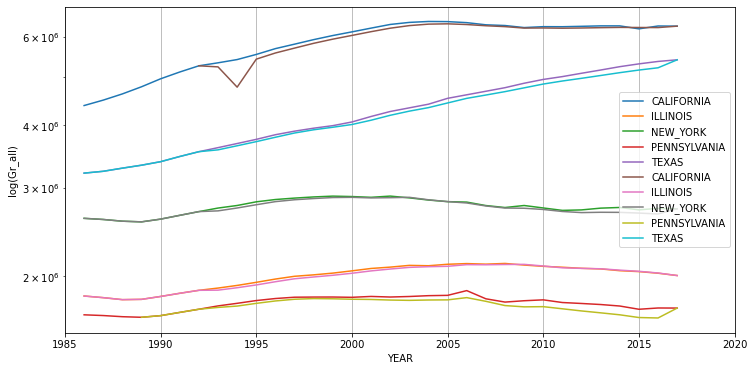

In [164]:
pl(get_sortedby(dfv0, 5, 'TOTAL_REVENUE'), 'Gr_all', log=True)
pl(get_sortedby(dfv1, 5, 'TOTAL_REVENUE'), 'Gr_all', log=True)

The 5 states with the highest values of TOTAL_REVENUE are 
 (greatest->least) ['CALIFORNIA', 'NEW_YORK', 'TEXAS', 'ILLINOIS', 'PENNSYLVANIA']


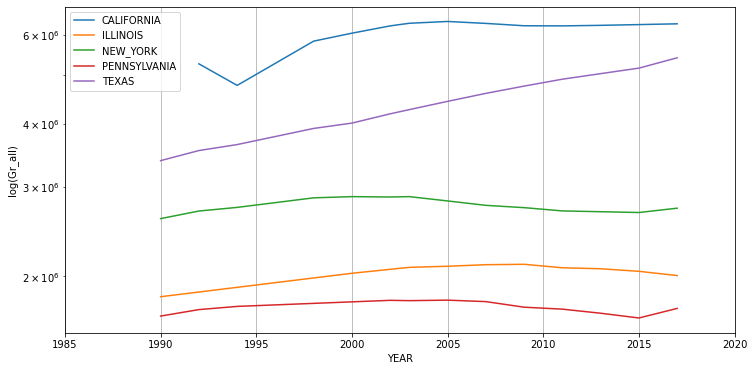

In [173]:
pl(get_sortedby(dfv2, 5, 'TOTAL_REVENUE'), 'Gr_all', log=True)

The 5 states with the highest values of TOTAL_REVENUE are 
 (greatest->least) ['CALIFORNIA', 'NEW_YORK', 'TEXAS', 'PENNSYLVANIA', 'ILLINOIS']


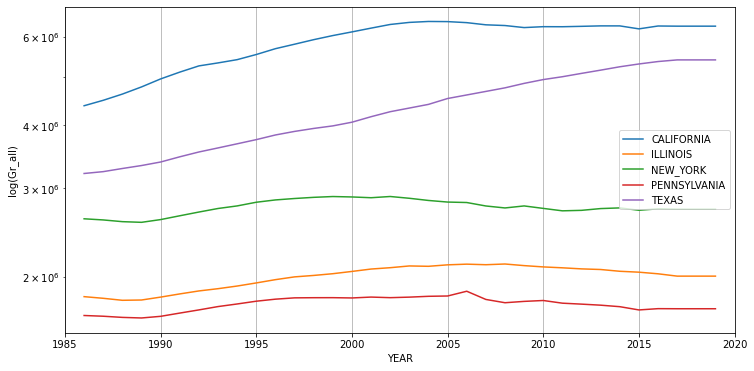

In [153]:
pl(get_sortedby(dfv4, 5, 'TOTAL_REVENUE'), 'Gr_all', log=True)

## Scores:
It seems that backfilling is much more crude (produces more plateus) than interpolation.

The 5 states with the highest values of TOTAL_REVENUE are 
 (greatest->least) ['CALIFORNIA', 'NEW_YORK', 'TEXAS', 'PENNSYLVANIA', 'ILLINOIS']
The 5 states with the highest values of TOTAL_REVENUE are 
 (greatest->least) ['CALIFORNIA', 'NEW_YORK', 'TEXAS', 'ILLINOIS', 'PENNSYLVANIA']


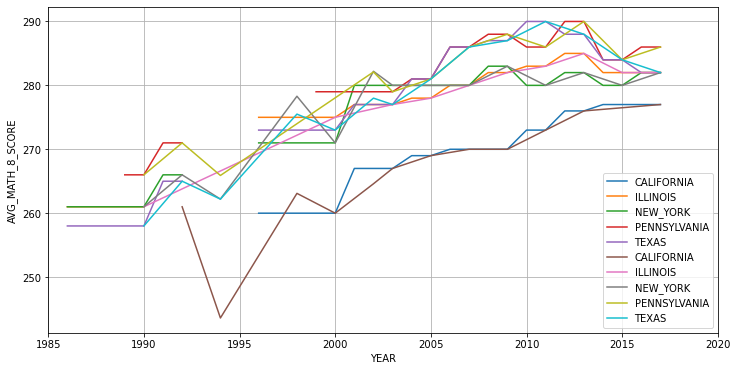

In [170]:
pl(get_sortedby(dfv1a, 5, 'TOTAL_REVENUE'), 'AVG_MATH_8_SCORE')
pl(get_sortedby(dfv2, 5, 'TOTAL_REVENUE'), 'AVG_MATH_8_SCORE')
pl(get_sortedby(dfv4, 5, 'TOTAL_REVENUE'), 'AVG_MATH_8_SCORE')

## Unfortunately, I simply cant spend any more time on this assignment.